In [2]:
## Analysing Bitcoin Prices over the last 5 years and comparing to the S&P 500 and other crypto currencies - imported modules below ##

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

In [3]:
## I am creating a function to turn a csv file into a data frame into the same format and add it's closing price column to a combined file

## I want to add in a column in our dataframe with the year the closing price was taken from for later
# for this I'm creating a function that can be used for any dataframe with a 'Date' column while creating a month function too using the same principles



dfcom1 = pd.DataFrame()

def csvtodataframe(file, coin):
    csvfile = pd.read_csv(file)
    df = pd.DataFrame(csvfile)
    df.rename(columns = {'Close' : 'Close {}'.format(coin)}, inplace = True) # renaming each indiviual closing price for when we'll be comparing coins later on
    dfcom1['Date'] = df['Date']
    dfcom1['Closing {}'.format(coin)] = df['Close {}'.format(coin)]
    def year(df):
        new = df["Date"].str.split("/", n = 3, expand = True)
        df["Year"] = new[2]
        return df
    dfy = year(df)
    return dfy


def year(df):
    new = df["Date"].str.split("/", n = 3, expand = True)
    df["Year"] = new[2]
    return df

In [4]:
dfybit = csvtodataframe('BitcoinvUSD.csv', 'BITCOIN')
dfybit ## The Bitcoin Data Frame

,Date,Open,High,Low,Close BITCOIN,Adj Close,Volume,Year
0,9/11/2017,7446.830078,7446.830078,7101.520020,7143.580078,7143.580078,3.226250e+09,2017
1,10/11/2017,7173.729980,7312.000000,6436.870117,6618.140137,6618.140137,5.208250e+09,2017
2,11/11/2017,6618.609863,6873.149902,6204.220215,6357.600098,6357.600098,4.908680e+09,2017
3,12/11/2017,6295.450195,6625.049805,5519.009766,5950.069824,5950.069824,8.957350e+09,2017
4,13/11/2017,5938.250000,6811.189941,5844.290039,6559.490234,6559.490234,6.263250e+09,2017
...,...,...,...,...,...,...,...,...
1759,3/09/2022,19969.718750,20037.009770,19698.355470,19832.087890,19832.087890,2.361305e+10,2022
1760,4/09/2022,19832.470700,19999.689450,19636.816410,19986.712890,19986.712890,2.524586e+10,2022
1761,5/09/2022,19988.789060,20031.160160,19673.046880,19812.371090,19812.371090,2.881346e+10,2022
1762,6/09/2022,19817.724610,20155.269530,18800.171880,18837.667970,18837.667970,4.340398e+10,2022


In [5]:
dfcom2021 = pd.DataFrame() # Creating a combined data frame for 2021 data
dfcom2022 = pd.DataFrame() # Creating a combined data frame for 2022 YTD data

## Creating a function to split a given dataframe into a data frame for each unique year's data

def splitbyyear(df,coin):
    df_list = [d for _, d in df.groupby(['Year'])] # Grouping by year
    df2021 = df_list[4]
    dfcom2021['Date'] = df2021['Date']
    dfcom2021['Closing {}'.format(coin)] = df2021['Close {}'.format(coin)]
    df2022 = df_list[5]
    dfcom2022['Date'] = df2022['Date']
    dfcom2022['Closing {}'.format(coin)] = df2022['Close {}'.format(coin)]
    
    return df_list

In [6]:
dfbit_list = splitbyyear(dfybit, 'BITCOIN')

In [7]:
dfcom2021 # The combined data frame for 2021 data with just Bitcoin included

,Date,Closing BITCOIN
1149,1/01/2021,29374.15234
1150,2/01/2021,32127.26758
1151,3/01/2021,32782.02344
1152,4/01/2021,31971.91406
1153,5/01/2021,33992.42969
...,...,...
1509,27/12/2021,50640.41797
1510,28/12/2021,47588.85547
1511,29/12/2021,46444.71094
1512,30/12/2021,47178.12500


In [8]:
def plotmeanbyyear(df,coin): #A function to plot the yearly average closing price given a dataframe and the name of the coin
    dfmean = df.groupby('Year').mean()
    dfmean['Close {}'.format(coin)].plot(kind = "bar")
    plt.title("Closing Price Average by Year - {}".format(coin))
    plt.xlabel("Year")
    plt.ylabel("Price ($)")
    plt.show()

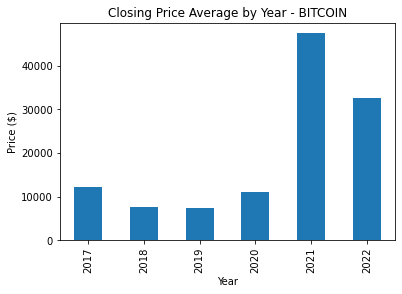

In [9]:
plotmeanbyyear(dfybit, 'BITCOIN')

In [10]:
def plot2021plot(df,coin):  # A function to plot the monthly average closing price during 2021 given a dataframe and the name of the coin
    def month(df):
        new = df["Date"].str.split("/", n = 3, expand = True)
        df["Month"] = new[1]
        return df
    df2021month = month(df)
    df2021month
    dfmean2021 = df2021month.groupby('Month').mean()
    dfmean2021['Close {}'.format(coin)].plot(kind = "bar", color = 'y')
    plt.title("Closing Price Average by Month (2021) ($) - {} ".format(coin))
    plt.xlabel("Month")
    plt.ylabel("Price ($)")
    plt.show()
    
    
def month(df):  #A  function to add a month column to the 2021 data frame of a given coin
    new = df["Date"].str.split("/", n = 3, expand = True)
    df["Month"] = new[1]
    return df

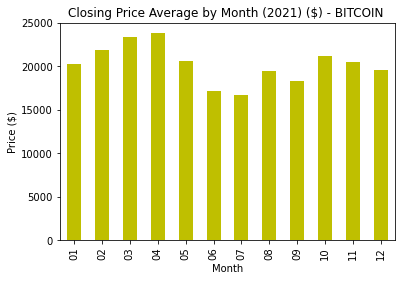

In [11]:
plot2021plot(dfybit, 'BITCOIN')

In [12]:
def scatterplot(df,coin): # A function to plot the scatterplot of the pricing history of a given coin, colour coding each data point by year
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    sns.scatterplot(x='Date',y='Close {}'.format(coin), data=df, ax = ax, hue='Year').set(title = 'Closing Price in USD of {}'.format(coin))
    days = mdates.DayLocator(interval=365)
    ax.xaxis.set_major_locator(days)

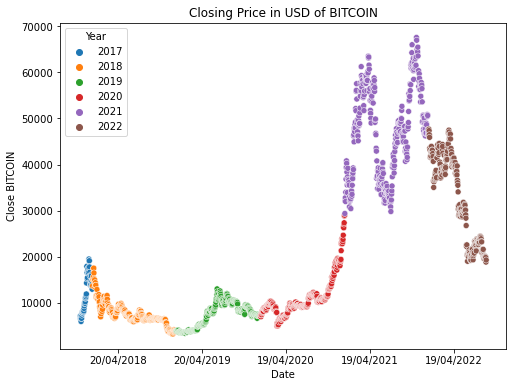

In [13]:
scatterplot(dfybit, 'BITCOIN')

In [14]:
def plots(file,coin): # Combining all three above plots into one function
    df = csvtodataframe(file,coin)
    dfy = year(df)
    dfbit_list = splitbyyear(df,coin)
    df2021 = dfbit_list[4]
    return plotmeanbyyear(dfy,coin), plot2021plot(df2021,coin), scatterplot(dfy,coin)


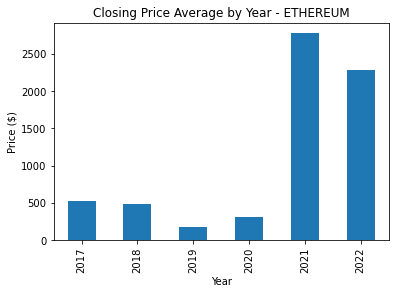

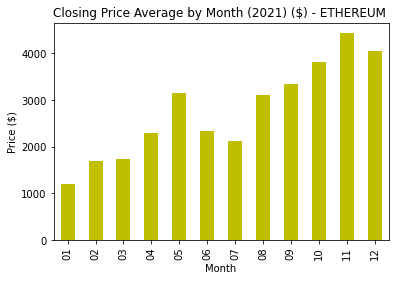

(None, None, None)

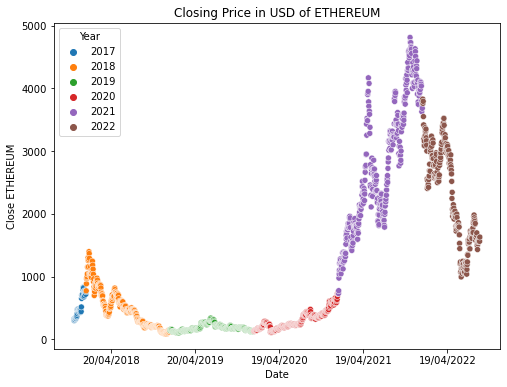

In [15]:
dfeth = csvtodataframe('ETHvUSD.csv', 'ETHEREUM')
dfeth
plots('ETHvUSD.csv', 'ETHEREUM') # Printing three plots for Ethereum

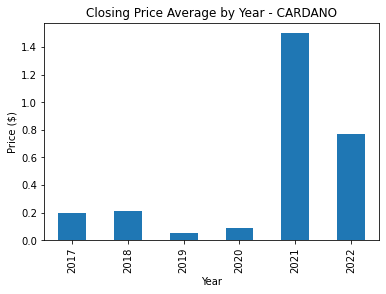

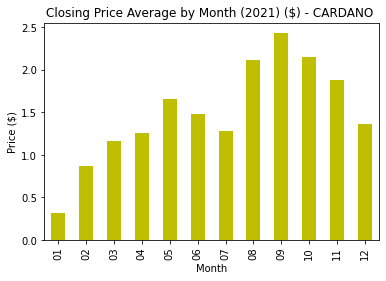

(None, None, None)

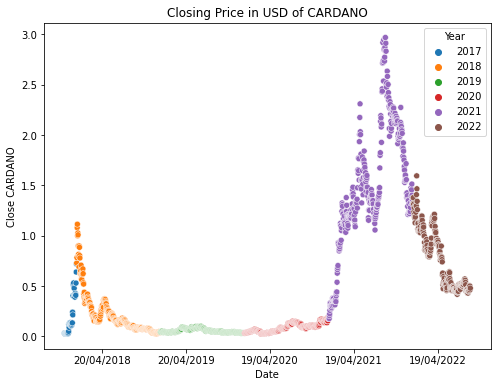

In [16]:
plots('ADAvUSD.csv', 'CARDANO') # Printing three plots for Cardano

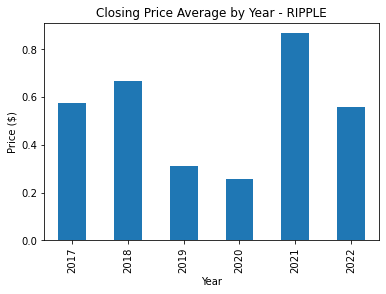

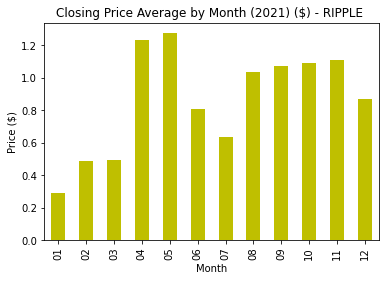

(None, None, None)

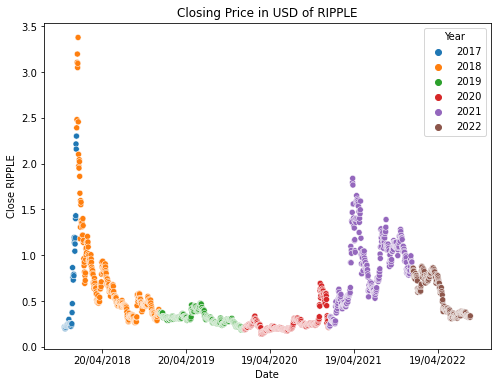

In [17]:
plots('XRPvUSD.csv', 'RIPPLE') # Printing three plots for Ripple


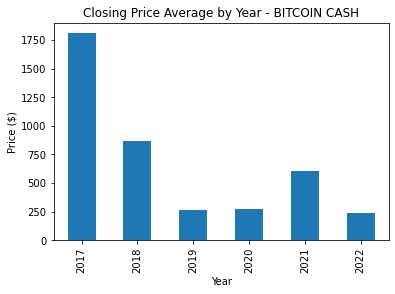

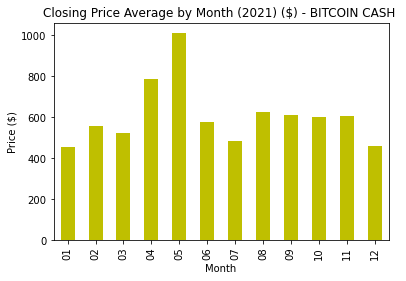

(None, None, None)

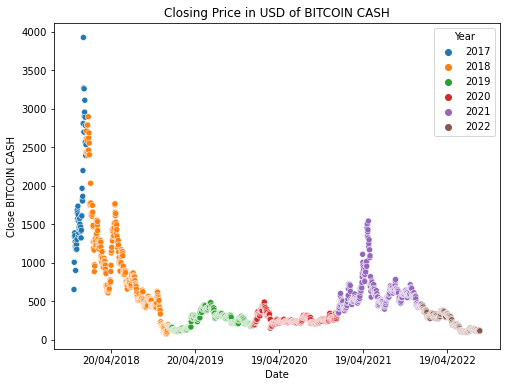

In [18]:
plots('BCHvUSD.csv', 'BITCOIN CASH') # Printing three plots for Bitcoin Cash

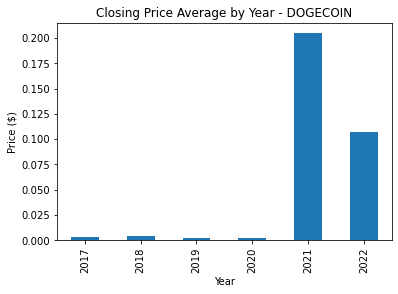

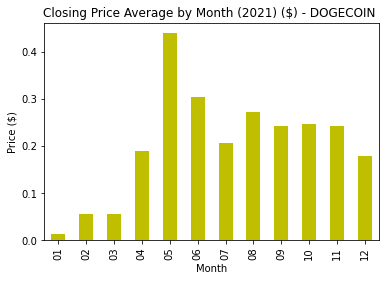

(None, None, None)

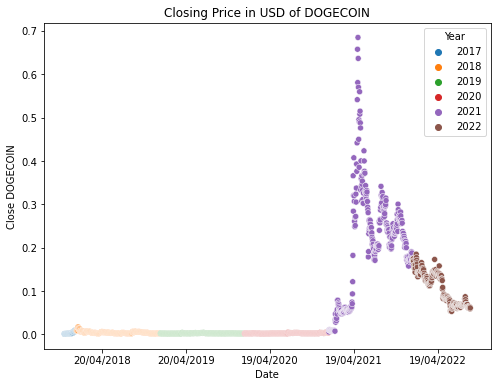

In [19]:
plots('DOGEvUSD.csv', 'DOGECOIN') # Printing three plots for Dogecoin

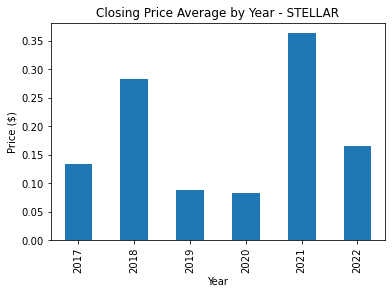

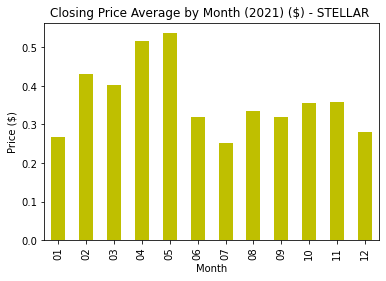

(None, None, None)

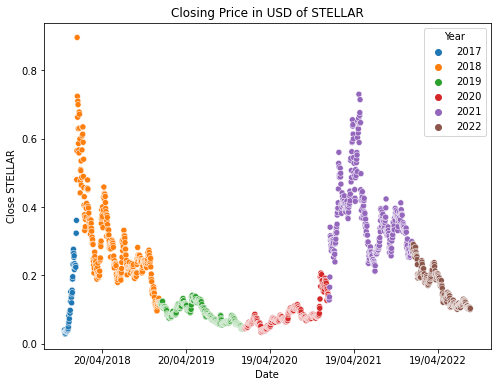

In [20]:
plots('XLMvUSD.csv', 'STELLAR') # Printing three plots for Stellar

In [21]:
dfcom1 # Combined Data Frame with all files now read in

,Date,Closing BITCOIN,Closing ETHEREUM,Closing CARDANO,Closing RIPPLE,Closing BITCOIN CASH,Closing DOGECOIN,Closing STELLAR
0,9/11/2017,7143.580078,320.884003,0.032053,0.217488,654.302979,0.001415,0.039946
1,10/11/2017,6618.140137,299.252991,0.027119,0.206483,1007.419983,0.001163,0.033073
2,11/11/2017,6357.600098,314.681000,0.027437,0.210430,1340.449951,0.001201,0.033053
3,12/11/2017,5950.069824,307.907990,0.023977,0.197339,1388.859985,0.001038,0.028182
4,13/11/2017,6559.490234,316.716003,0.025808,0.203442,1353.989990,0.001211,0.030656
...,...,...,...,...,...,...,...,...
1759,3/09/2022,19832.087890,1556.872681,0.480387,0.329969,117.704323,0.062694,0.105282
1760,4/09/2022,19986.712890,1577.641602,0.503084,0.331799,118.137352,0.063226,0.106389
1761,5/09/2022,19812.371090,1617.183228,0.499121,0.332960,125.668602,0.062738,0.105038
1762,6/09/2022,18837.667970,1561.748535,0.463066,0.322208,112.500648,0.058983,0.099963


In [48]:
nulls = dfcom1.isnull().sum() # Checking the data frame for any potential nulls
duplicates = dfcom1.duplicated().sum() # Checking the data frame for any potential duplicates

In [49]:
nulls

Closing BITCOIN         0
Closing ETHEREUM        0
Closing CARDANO         0
Closing RIPPLE          0
Closing BITCOIN CASH    0
Closing DOGECOIN        0
Closing STELLAR         0
dtype: int64

In [50]:
duplicates

0

In [23]:
dfcom1.set_index('Date', inplace=True)
dfcom1 #Set index to 'Date' Column to clean data frame

,Closing BITCOIN,Closing ETHEREUM,Closing CARDANO,Closing RIPPLE,Closing BITCOIN CASH,Closing DOGECOIN,Closing STELLAR
Date,,,,,,,
9/11/2017,7143.580078,320.884003,0.032053,0.217488,654.302979,0.001415,0.039946
10/11/2017,6618.140137,299.252991,0.027119,0.206483,1007.419983,0.001163,0.033073
11/11/2017,6357.600098,314.681000,0.027437,0.210430,1340.449951,0.001201,0.033053
12/11/2017,5950.069824,307.907990,0.023977,0.197339,1388.859985,0.001038,0.028182
13/11/2017,6559.490234,316.716003,0.025808,0.203442,1353.989990,0.001211,0.030656
...,...,...,...,...,...,...,...
3/09/2022,19832.087890,1556.872681,0.480387,0.329969,117.704323,0.062694,0.105282
4/09/2022,19986.712890,1577.641602,0.503084,0.331799,118.137352,0.063226,0.106389
5/09/2022,19812.371090,1617.183228,0.499121,0.332960,125.668602,0.062738,0.105038


In [24]:
corrplot2017to2021 = dfcom1.corr() 
corrplot2017to2021 # Correlation Plot for all coins in the entire time frame

,Closing BITCOIN,Closing ETHEREUM,Closing CARDANO,Closing RIPPLE,Closing BITCOIN CASH,Closing DOGECOIN,Closing STELLAR
Closing BITCOIN,1.000000,0.925733,0.885814,0.557293,0.073288,0.795154,0.600692
Closing ETHEREUM,0.925733,1.000000,0.918833,0.633220,0.117699,0.855765,0.574241
Closing CARDANO,0.885814,0.918833,1.000000,0.693590,0.194622,0.882390,0.651307
Closing RIPPLE,0.557293,0.633220,0.693590,1.000000,0.661395,0.602389,0.841712
Closing BITCOIN CASH,0.073288,0.117699,0.194622,0.661395,1.000000,0.105817,0.621428
Closing DOGECOIN,0.795154,0.855765,0.882390,0.602389,0.105817,1.000000,0.555981
Closing STELLAR,0.600692,0.574241,0.651307,0.841712,0.621428,0.555981,1.000000


In [25]:
corrplot2021 = dfcom2021.corr()

In [26]:
corrplot2021 # Correlation Plot for all coins during 2021

,Closing BITCOIN,Closing ETHEREUM,Closing CARDANO,Closing RIPPLE,Closing BITCOIN CASH,Closing DOGECOIN,Closing STELLAR
Closing BITCOIN,1.000000,0.553255,0.390233,0.530531,0.375699,0.117759,0.537213
Closing ETHEREUM,0.553255,1.000000,0.722010,0.705500,0.284207,0.581947,0.081901
Closing CARDANO,0.390233,0.722010,1.000000,0.719674,0.316506,0.628071,0.135139
Closing RIPPLE,0.530531,0.705500,0.719674,1.000000,0.712952,0.783078,0.544102
Closing BITCOIN CASH,0.375699,0.284207,0.316506,0.712952,1.000000,0.709231,0.825432
Closing DOGECOIN,0.117759,0.581947,0.628071,0.783078,0.709231,1.000000,0.345369
Closing STELLAR,0.537213,0.081901,0.135139,0.544102,0.825432,0.345369,1.000000


<AxesSubplot:>

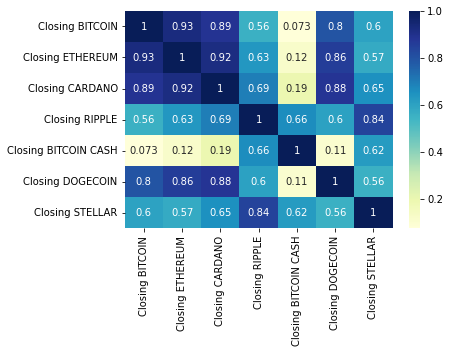

In [27]:
sns.heatmap(corrplot2017to2021,annot = True, cmap="YlGnBu") # Heatmap for full correlation plot

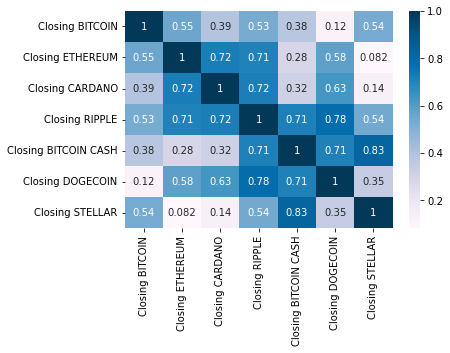

In [28]:
corrplot2021 = dfcom2021.corr()
corrplot2021 = sns.heatmap(corrplot2021,annot = True, cmap="PuBu") # Heatmap for 2021 correlation plot

<AxesSubplot:>

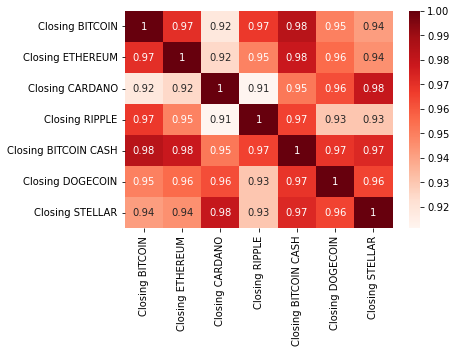

In [29]:
corrplot2022= dfcom2022.corr() # Correlation Plot for all coins for 2022 YTD
sns.heatmap(corrplot2022,annot = True, cmap="Reds") # Heatmap for above data frame containing 2022 correlations

In [30]:
dfcom1.describe() # Describing the data for each coin for the full period 2017-2022

,Closing BITCOIN,Closing ETHEREUM,Closing CARDANO,Closing RIPPLE,Closing BITCOIN CASH,Closing DOGECOIN,Closing STELLAR
count,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000
mean,20221.395440,1116.769340,0.498328,0.531554,502.655769,0.059624,0.196691
std,17340.484716,1224.326323,0.643265,0.374796,450.644766,0.101264,0.138465
min,3236.761719,84.308296,0.023961,0.139635,77.365776,0.001038,0.028182
25%,7514.621460,205.354435,0.059702,0.277574,236.395908,0.002549,0.082583
50%,10409.045895,454.318649,0.139925,0.383835,343.551269,0.003502,0.145748
75%,34663.964845,1830.179352,0.837182,0.709151,592.628281,0.070245,0.276198
max,67566.828130,4812.087402,2.968239,3.377810,3923.070068,0.684777,0.896227


In [31]:
for column in dfcom2022.columns[1:]:
    print(format(np.mean(dfcom2022[column]))) # Finding the mean price of each coin during the full period of time in order of each column in the above data frame

32693.057391280003
2289.176427532001
0.7698107960000005
0.55819166
237.2285043079999
0.10690447599999997
0.16528646399999997


In [32]:
def coeffvar(column): # Creating function to calculate coefficient of variation of a list of numbers
    coeff = np.std(column)/np.mean(column)
    if coeff > 0:
        return coeff
    else:
        return None  
    

In [33]:
coindict = {'Coin': ['BTC', 'ETH', 'ADA', 'XRP', 'BCH', 'DOGE', 'XLM'], 'Coefficient of Variation' : 
                    [coeffvar(dfcom1['Closing BITCOIN']),coeffvar(dfcom1['Closing ETHEREUM']),
                              coeffvar(dfcom1['Closing CARDANO']),coeffvar(dfcom1['Closing RIPPLE']),
                              coeffvar(dfcom1['Closing BITCOIN CASH']),coeffvar(dfcom1['Closing DOGECOIN']),coeffvar(dfcom1['Closing STELLAR'])]}

covdf = pd.DataFrame(coindict)
covdf.set_index('Coin', inplace=True)
covdf # Data Frame of each coin's coefficient of variation with coin set as the index


,Coefficient of Variation
Coin,
BTC,0.857288
ETH,1.096000
ADA,1.290482
XRP,0.704895
BCH,0.896273
DOGE,1.697898
XLM,0.703771


In [34]:
coinmeandict = {'Coin': ['BTC', 'ETH', 'ADA', 'XRP', 'BCH', 'DOGE', 'XLM'], 'Mean' : 
                    [np.mean(dfcom1['Closing BITCOIN']),np.mean(dfcom1['Closing ETHEREUM']),
                              np.mean(dfcom1['Closing CARDANO']),np.mean(dfcom1['Closing RIPPLE']),
                              np.mean(dfcom1['Closing BITCOIN CASH']),np.mean(dfcom1['Closing DOGECOIN']),np.mean(dfcom1['Closing STELLAR'])]}

meandf = pd.DataFrame(coinmeandict)
meandf.set_index('Coin', inplace=True) # Data Frame of each coin's mean with coin set as the index

coinstddict = {'Coin': ['BTC', 'ETH', 'ADA', 'XRP', 'BCH', 'DOGE', 'XLM'], 'Standard Deviation' : 
                    [np.std(dfcom1['Closing BITCOIN']),np.std(dfcom1['Closing ETHEREUM']),
                              np.std(dfcom1['Closing CARDANO']),np.std(dfcom1['Closing RIPPLE']),
                              np.std(dfcom1['Closing BITCOIN CASH']),np.std(dfcom1['Closing DOGECOIN']),np.std(dfcom1['Closing STELLAR'])]}  # Data Frame of each coin's standard deviation with coin set as the index

stddf = pd.DataFrame(coinstddict)
stddf.set_index('Coin', inplace=True)

In [35]:
mergedf = covdf.merge(meandf,left_index=True, right_index=True)
mergedf.merge(stddf,left_index=True, right_index=True) # Merging the three data frames together

,Coefficient of Variation,Mean,Standard Deviation
Coin,,,
BTC,0.857288,20221.395440,17335.568916
ETH,1.096000,1116.769340,1223.979243
ADA,1.290482,0.498328,0.643083
XRP,0.704895,0.531554,0.374690
BCH,0.896273,502.655769,450.517014
DOGE,1.697898,0.059624,0.101235
XLM,0.703771,0.196691,0.138426


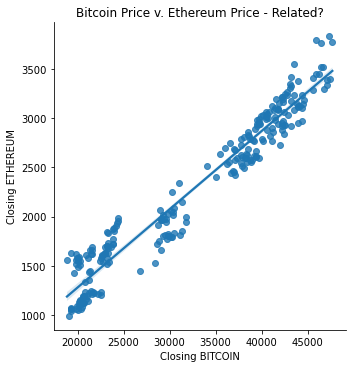

In [36]:
 sns.lmplot(x = 'Closing BITCOIN', y = 'Closing ETHEREUM', data = dfcom2022).set(title = 'Bitcoin Price v. Ethereum Price - Related?') # Plotting Bitcoin prices with the corresponding Ethereum Price
                                                                                                                                            # on a given day and adding a line of best fit